In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set a random seed for reproducibility
np.random.seed(42)

# --- Synthetic Data Generation (1200 users) ---
n_users = 1200
data = {}

# 1. Lurkers (Low engagement, low activity) - 300 users
data['Lurker'] = {
    'Followers': np.random.randint(50, 500, 300),
    'Following': np.random.randint(500, 1500, 300),
    'Posts': np.random.randint(10, 80, 300),
    'Likes': np.random.randint(500, 5000, 300),
    'Comments': np.random.randint(50, 500, 300),
    'Engagement_rate': np.random.uniform(0.005, 0.02, 300),
}

# 2. Active Users (Medium/High engagement, high activity) - 300 users
data['Active'] = {
    'Followers': np.random.randint(300, 1500, 300),
    'Following': np.random.randint(300, 1000, 300),
    'Posts': np.random.randint(100, 500, 300),
    'Likes': np.random.randint(5000, 20000, 300),
    'Comments': np.random.randint(500, 3000, 300),
    'Engagement_rate': np.random.uniform(0.02, 0.05, 300),
}

# 3. Micro/Macro Influencers (High followers, very high engagement) - 100 users (Outliers)
data['Influencer'] = {
    'Followers': np.random.randint(10000, 500000, 100),
    'Following': np.random.randint(100, 500, 100),
    'Posts': np.random.randint(50, 400, 100),
    'Likes': np.random.randint(50000, 500000, 100),
    'Comments': np.random.randint(5000, 50000, 100),
    'Engagement_rate': np.random.uniform(0.04, 0.1, 100),
}
data['Inactive'] = {
    'Followers': np.random.randint(10, 200, 500),

# 4. Inactive/Bot Accounts (High following/low followers, low activity) - 500 users
    'Following': np.random.randint(1000, 5000, 500),
    'Posts': np.random.randint(1, 10, 500),
    'Likes': np.random.randint(10, 100, 500),
    'Comments': np.random.randint(1, 10, 500),
    'Engagement_rate': np.random.uniform(0.001, 0.005, 500),
}

# Combine and shuffle
df = pd.concat([pd.DataFrame(d) for d in data.values()], ignore_index=True).sample(frac=1).reset_index(drop=True)
X = df.copy()
print(f"Dataset Size: {len(X)} users")

Dataset Size: 1200 users


In [3]:
df.head()


,Followers,Following,Posts,Likes,Comments,Engagement_rate
0,250853,260,140,407886,38919,0.055857
1,229911,102,372,465534,42055,0.064216
2,267354,410,270,314852,49367,0.091966
3,1093,563,239,5671,892,0.049846
4,1467,992,245,13766,919,0.047216


In [4]:
df.shape

(1200, 6)

Feature Engineering;

Engagement ratio=(likes+comments)/followers
Activity score=(post)/following+1

In [5]:
df['Engagement ratio']=(df['Likes']+df['Comments'])/df['Followers']

In [6]:
df.head()

,Followers,Following,Posts,Likes,Comments,Engagement_rate,Engagement ratio
0,250853,260,140,407886,38919,0.055857,1.781143
1,229911,102,372,465534,42055,0.064216,2.207763
2,267354,410,270,314852,49367,0.091966,1.362310
3,1093,563,239,5671,892,0.049846,6.004575
4,1467,992,245,13766,919,0.047216,10.010225


In [7]:
df['Actvity rate']=(df['Posts'])/(df['Following']+1)

In [8]:
df.head()

,Followers,Following,Posts,Likes,Comments,Engagement_rate,Engagement ratio,Actvity rate
0,250853,260,140,407886,38919,0.055857,1.781143,0.536398
1,229911,102,372,465534,42055,0.064216,2.207763,3.611650
2,267354,410,270,314852,49367,0.091966,1.362310,0.656934
3,1093,563,239,5671,892,0.049846,6.004575,0.423759
4,1467,992,245,13766,919,0.047216,10.010225,0.246727


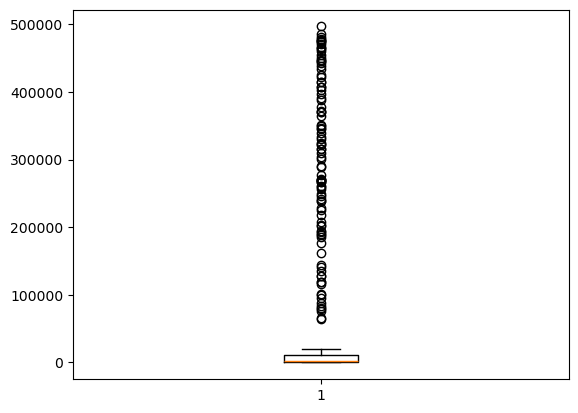

In [9]:
plt.boxplot(x=df['Likes'])
plt.show()

Handling Outliers

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


In [11]:
X_scaled

array([[ 2.97368896, -1.06065125,  0.23973959, ...,  1.78366985,
        -0.626195  ,  0.8609232 ],
       [ 2.70349216, -1.17762858,  1.8901724 , ...,  2.18623195,
        -0.58793408,  9.12911385],
       [ 3.18658732, -0.94959682,  1.16455108, ...,  3.52255466,
        -0.66375751,  1.18499853],
       ...,
       [-0.26115068, -0.31362511, -0.7277555 , ..., -0.83661118,
        -0.77302558, -0.57278149],
       [-0.26045397,  0.60072303, -0.69929976, ..., -0.78465252,
        -0.76857646, -0.57266318],
       [-0.2546609 , -0.5890401 ,  2.11781831, ...,  0.44924996,
         1.08541981,  0.62833097]])

In [12]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1.8, min_samples=10)
labels = db.fit_predict(X_scaled)

df['Cluster'] = labels


In [13]:
df.head()

,Followers,Following,Posts,Likes,Comments,Engagement_rate,Engagement ratio,Actvity rate,Cluster
0,250853,260,140,407886,38919,0.055857,1.781143,0.536398,-1
1,229911,102,372,465534,42055,0.064216,2.207763,3.611650,-1
2,267354,410,270,314852,49367,0.091966,1.362310,0.656934,-1
3,1093,563,239,5671,892,0.049846,6.004575,0.423759,0
4,1467,992,245,13766,919,0.047216,10.010225,0.246727,0


In [14]:
outliers=df[df['Cluster']==-1]
print("Outliers"+" "+str(len(outliers)) )

Outliers 101


In [15]:
df.head()

,Followers,Following,Posts,Likes,Comments,Engagement_rate,Engagement ratio,Actvity rate,Cluster
0,250853,260,140,407886,38919,0.055857,1.781143,0.536398,-1
1,229911,102,372,465534,42055,0.064216,2.207763,3.611650,-1
2,267354,410,270,314852,49367,0.091966,1.362310,0.656934,-1
3,1093,563,239,5671,892,0.049846,6.004575,0.423759,0
4,1467,992,245,13766,919,0.047216,10.010225,0.246727,0


Handling influencers(outliers)

In [16]:
influencers=df[df['Cluster']==-1]

In [17]:
influencers

,Followers,Following,Posts,Likes,Comments,Engagement_rate,Engagement ratio,Actvity rate,Cluster
0,250853,260,140,407886,38919,0.055857,1.781143,0.536398,-1
1,229911,102,372,465534,42055,0.064216,2.207763,3.611650,-1
2,267354,410,270,314852,49367,0.091966,1.362310,0.656934,-1
22,43870,167,163,466280,9769,0.045524,10.851356,0.970238,-1
26,354296,489,188,422282,45893,0.096684,1.321423,0.383673,-1
...,...,...,...,...,...,...,...,...,...
1152,28990,236,89,407246,6424,0.078261,14.269403,0.375527,-1
1153,42430,187,95,309904,5112,0.055523,7.424370,0.505319,-1
1154,429639,188,242,470343,15578,0.058774,1.130998,1.280423,-1
1165,59067,147,203,377602,28255,0.078910,6.871129,1.371622,-1


In [18]:
df.head()

,Followers,Following,Posts,Likes,Comments,Engagement_rate,Engagement ratio,Actvity rate,Cluster
0,250853,260,140,407886,38919,0.055857,1.781143,0.536398,-1
1,229911,102,372,465534,42055,0.064216,2.207763,3.611650,-1
2,267354,410,270,314852,49367,0.091966,1.362310,0.656934,-1
3,1093,563,239,5671,892,0.049846,6.004575,0.423759,0
4,1467,992,245,13766,919,0.047216,10.010225,0.246727,0


Removed Outliers(inluencers) and storing them seperately

In [19]:
cleaned_data=df[df['Cluster']>-1]

In [20]:
cleaned_data

,Followers,Following,Posts,Likes,Comments,Engagement_rate,Engagement ratio,Actvity rate,Cluster
3,1093,563,239,5671,892,0.049846,6.004575,0.423759,0
4,1467,992,245,13766,919,0.047216,10.010225,0.246727,0
5,398,771,60,785,64,0.014755,2.133166,0.077720,0
6,1166,415,263,19289,1050,0.033324,17.443396,0.632212,0
7,27,3707,1,16,5,0.002949,0.777778,0.000270,0
...,...,...,...,...,...,...,...,...,...
1195,93,2756,6,49,1,0.004407,0.537634,0.002176,0
1196,1333,620,131,11304,2720,0.029015,10.520630,0.210950,0
1197,132,1269,4,13,6,0.001445,0.143939,0.003150,0
1198,186,2504,8,34,2,0.002524,0.193548,0.003194,0


In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
scores={}
for i in range(2,7):
    model=KMeans(n_clusters=i,random_state=42)
    label=model.fit_predict(cleaned_data)
    scores[i]=silhouette_score(cleaned_data,label)
print(scores)

C:\Users\dsnat\anaconda3\envs\ml_lab\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\dsnat\anaconda3\envs\ml_lab\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\dsnat\anaconda3\envs\ml_lab\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\dsnat\anaconda3\envs\ml_lab\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

{2: 0.7320235113161502, 3: 0.642206346575958, 4: 0.5705136130900161, 5: 0.5591702444197093, 6: 0.5472083168057945}


C:\Users\dsnat\anaconda3\envs\ml_lab\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [22]:
best_k=max(scores,key=scores.get)

In [23]:
print(best_k)

2


In [24]:
kmeans=KMeans(n_clusters=best_k,random_state=42)
cleaned_data['kmeans_label']=kmeans.fit_predict(cleaned_data)

C:\Users\dsnat\anaconda3\envs\ml_lab\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\dsnat\AppData\Local\Temp\ipykernel_19132\4287145824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['kmeans_label']=kmeans.fit_predict(cleaned_data)


In [25]:
cleaned_data.head()

,Followers,Following,Posts,Likes,Comments,Engagement_rate,Engagement ratio,Actvity rate,Cluster,kmeans_label
3,1093,563,239,5671,892,0.049846,6.004575,0.423759,0,0
4,1467,992,245,13766,919,0.047216,10.010225,0.246727,0,1
5,398,771,60,785,64,0.014755,2.133166,0.077720,0,0
6,1166,415,263,19289,1050,0.033324,17.443396,0.632212,0,1
7,27,3707,1,16,5,0.002949,0.777778,0.000270,0,0


In [26]:
# Compute hierarchical linkage
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
Z = linkage(cleaned_data, method='ward')

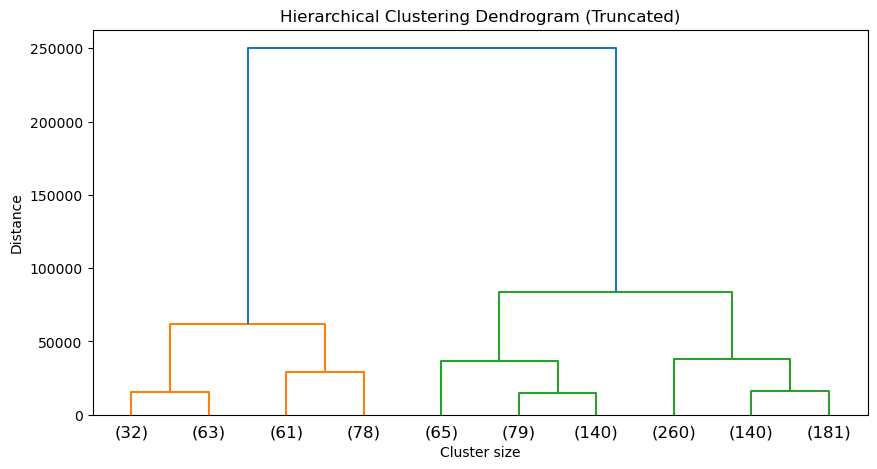

In [27]:
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode='lastp', p=10)
plt.title("Hierarchical Clustering Dendrogram (Truncated)")
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.show()


In [28]:
# Choose number of clusters (same as K-Means)
hier_labels = fcluster(Z, t=best_k, criterion='maxclust')
cleaned_data['Hier_Label'] = hier_labels

C:\Users\dsnat\AppData\Local\Temp\ipykernel_19132\2388181687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Hier_Label'] = hier_labels


In [29]:
features=['Followers','Following','Posts','Likes','Comments','Engagement_rate']
kmeans_summary = cleaned_data.groupby('kmeans_label')[features].mean()
hier_summary = cleaned_data.groupby('Hier_Label')[features].mean()


In [30]:
print("K-Means Cluster Centers:\n", kmeans_summary)

K-Means Cluster Centers:
                Followers    Following       Posts         Likes     Comments  \
kmeans_label                                                                   
0             221.040888  2149.517523   38.231308   1410.206776   214.487150   
1             955.588477   666.201646  296.411523  14068.111111  1800.333333   

              Engagement_rate  
kmeans_label                   
0                    0.008391  
1                    0.035369  


In [31]:
print("\nHierarchical Cluster Means:\n", hier_summary)


Hierarchical Cluster Means:
              Followers    Following       Posts         Likes     Comments  \
Hier_Label                                                                   
1           951.743590   668.059829  294.380342  14310.517094  1787.405983   
2           229.723699  2133.581503   41.467052   1476.331792   234.484393   

            Engagement_rate  
Hier_Label                   
1                  0.035398  
2                  0.008664  
